In [1]:
using JLD
using PyPlot
using Statistics
using StatsBase 
using LinearAlgebra
using KernelDensity

┌ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
└ @ Base loading.jl:1278


In [2]:
using JLD2
using FileIO

In [3]:
function reduce_bins(x::AbstractArray, y::AbstractArray, δ::Integer)
    if length(x) == length(y)
        x_new = [x[i] for i in 1:δ:length(x)]
        y_new = [mean(y[i:(i+δ-1>length(y) ? length(y) : i+δ-1 )]) for i in 1:δ:length(y)]
        return vcat(x_new, [maximum(x)+1]), vcat(y_new, [0])
    else
        @warn "Dims Error"
    end
end

function reduced_steps(hist::H, δ::Integer) where {H<:Histogram}
    x = hist.edges[1][1:end-1]
    y = hist.weights
    return reduce_bins(x, y, δ)
end

reduced_steps (generic function with 1 method)

In [4]:
data = load("../data/experiment/images.jld")

Dict{String,Any} with 5 entries:
  "ImagesIS2"   => [0 0 … 0 0; 0 0 … 0 0; … ; 43 33 … 35 15; 23 140 … 44 28]…
  "ImagesBTV50" => [10 3 … 0 0; 3 0 … 0 0; … ; 6 0 … 0 0; 4 0 … 0 0]…
  "charge"      => [0.1298, 0.1712, 0.095, 0.0433, 0.097, 0.136, 0.1404, 0.1837…
  "ImagesBTV26" => [81 24 … 14 0; 70 49 … 37 0; … ; 38 54 … 23 3; 69 22 … 23 4]…
  "ImagesBTV53" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 21 0; 0 0 … 0 0]…

In [5]:
cam_1 = Float64.(data["ImagesBTV50"])
cam_2 = Float64.(data["ImagesBTV53"])
cam_3  = Float64.(data["ImagesBTV26"])
cam_4 = Float64.(data["ImagesIS2"])
charge  = Float64.(data["charge"])

enumerate_events = collect(1:length(charge));

## Cam 1:

In [6]:
sum_over_y = sum(cam_1, dims=2)[:,1,:]
sum_over_x = sum(cam_1, dims=3)[:,:,1]

y_max = argmax(sum(sum_over_x, dims=1)[1,:])
x_max = argmax(sum(sum_over_y, dims=1)[1,:])

δ = 35

y_range = (y_max-δ, y_max+δ)
x_range = (x_max-δ, x_max+δ);

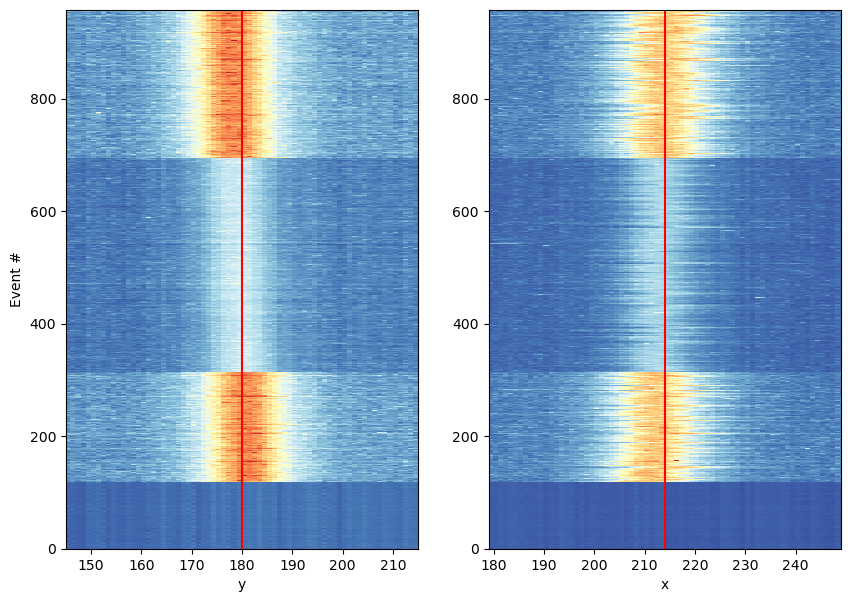

(179.0, 249.0)

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,7))

ax[1].pcolormesh(sum_over_x, cmap="RdYlBu_r")
ax[2].pcolormesh(sum_over_y, cmap="RdYlBu_r")

ax[1].axvline([y_max], color="red")
ax[2].axvline([x_max], color="red")

ax[1].set_xlabel("y")
ax[2].set_xlabel("x")
ax[1].set_ylabel("Event #")

ax[1].set_xlim(y_range[1], y_range[2])
ax[2].set_xlim(x_range[1], x_range[2])

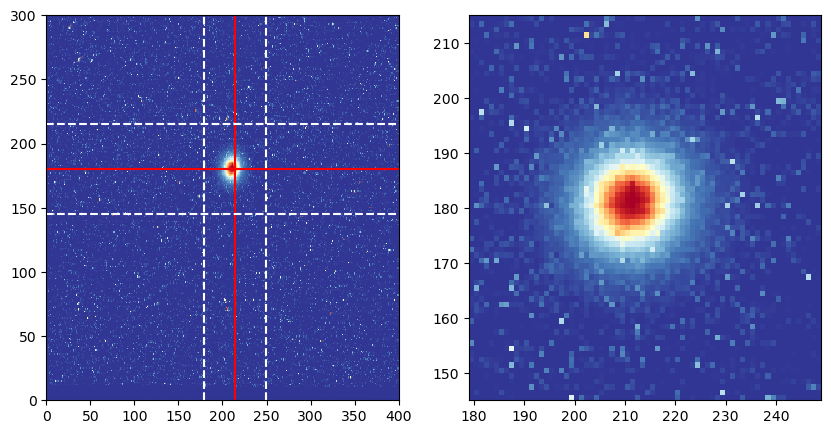

(145.0, 215.0)

In [8]:
fig, (ax, ax_2) = plt.subplots(1,2, figsize=(10,5))

ax.pcolormesh(cam_1[200,:,:], cmap="RdYlBu_r")
ax_2.pcolormesh(cam_1[200,:,:], cmap="RdYlBu_r")

ax.axvline([x_max], color="red")
ax.axhline([y_max], color="red")

ax.axvline([x_range[1]], color="white", ls="--")
ax.axvline([x_range[2]], color="white", ls="--")
ax.axhline([y_range[1]], color="white", ls="--")
ax.axhline([y_range[2]], color="white", ls="--")

ax_2.set_xlim(x_range)
ax_2.set_ylim(y_range)

In [ ]:
# cam_1 = cam_1[:, y_range[1]:y_range[2], x_range[1]:x_range[2]];


In [9]:
cam_1_frame = (x=x_range, y=y_range)

(x = (179, 249), y = (145, 215))

## Cam 2:

In [10]:
sum_over_y = sum(cam_2, dims=2)[:,1,:]
sum_over_x = sum(cam_2, dims=3)[:,:,1]

y_max = argmax(sum(sum_over_x, dims=1)[1,:])
x_max = argmax(sum(sum_over_y, dims=1)[1,:])

δ = 35

y_range = (y_max-δ, y_max+δ)
x_range = (x_max-δ, x_max+δ)

(156, 226)

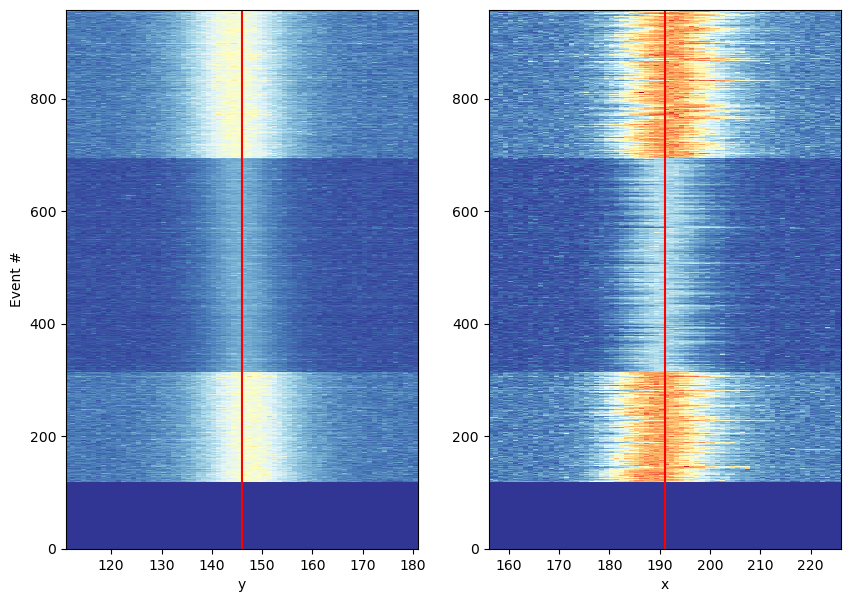

(156.0, 226.0)

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,7))

ax[1].pcolormesh(sum_over_x, cmap="RdYlBu_r")
ax[2].pcolormesh(sum_over_y, cmap="RdYlBu_r")

ax[1].axvline([y_max], color="red")
ax[2].axvline([x_max], color="red")

ax[1].set_xlabel("y")
ax[2].set_xlabel("x")
ax[1].set_ylabel("Event #")

ax[1].set_xlim(y_range[1], y_range[2])
ax[2].set_xlim(x_range[1], x_range[2])

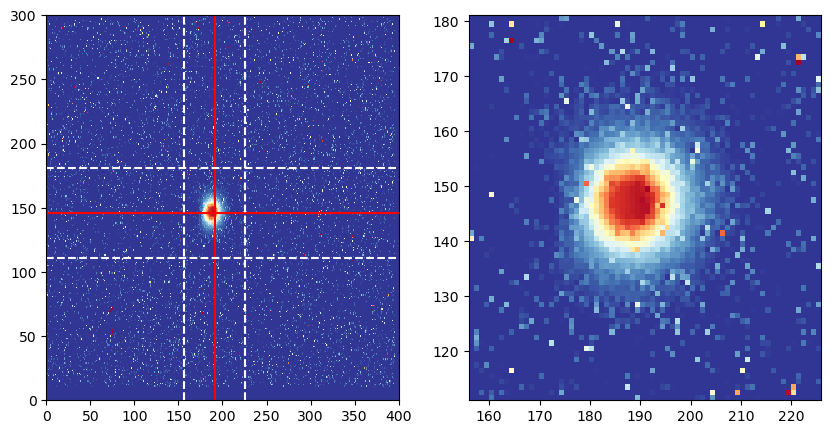

(111.0, 181.0)

In [12]:
fig, (ax, ax_2) = plt.subplots(1,2, figsize=(10,5))

ax.pcolormesh(cam_2[200,:,:], cmap="RdYlBu_r")
ax_2.pcolormesh(cam_2[200,:,:], cmap="RdYlBu_r")

ax.axvline([x_max], color="red")
ax.axhline([y_max], color="red")

ax.axvline([x_range[1]], color="white", ls="--")
ax.axvline([x_range[2]], color="white", ls="--")
ax.axhline([y_range[1]], color="white", ls="--")
ax.axhline([y_range[2]], color="white", ls="--")

ax_2.set_xlim(x_range)
ax_2.set_ylim(y_range)

In [13]:
cam_2_frame = (x=x_range, y=y_range)

(x = (156, 226), y = (111, 181))

## Cam 3:

In [14]:
sum_over_y = sum(cam_3, dims=2)[:,1,:]
sum_over_x = sum(cam_3, dims=3)[:,:,1]

y_max = argmax(sum(sum_over_x, dims=1)[1,:])
x_max = argmax(sum(sum_over_y, dims=1)[1,:])

δ = 20

y_range = (y_max-δ, y_max+δ)
x_range = (x_max-δ, x_max+δ)

(204, 244)

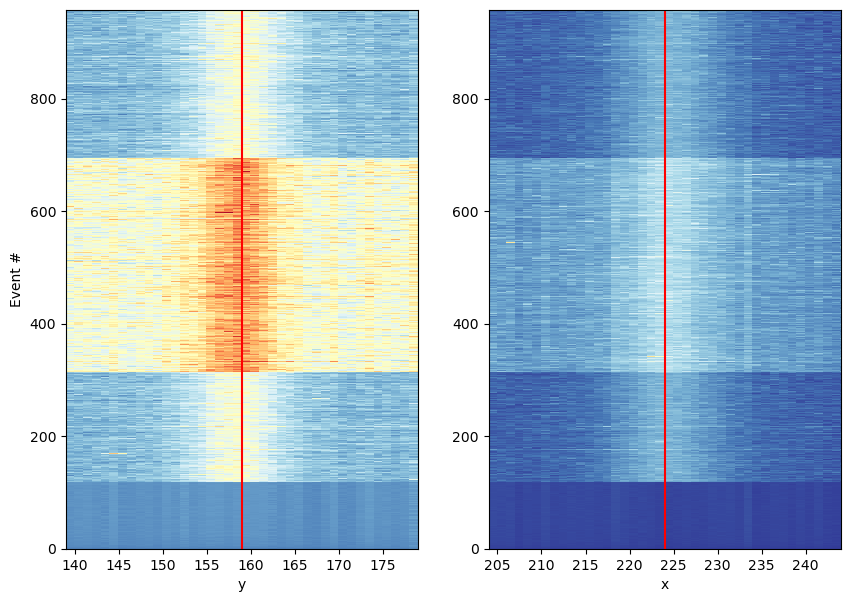

(204.0, 244.0)

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,7))

ax[1].pcolormesh(sum_over_x, cmap="RdYlBu_r")
ax[2].pcolormesh(sum_over_y, cmap="RdYlBu_r")

ax[1].axvline([y_max], color="red")
ax[2].axvline([x_max], color="red")

ax[1].set_xlabel("y")
ax[2].set_xlabel("x")
ax[1].set_ylabel("Event #")

ax[1].set_xlim(y_range[1], y_range[2])
ax[2].set_xlim(x_range[1], x_range[2])

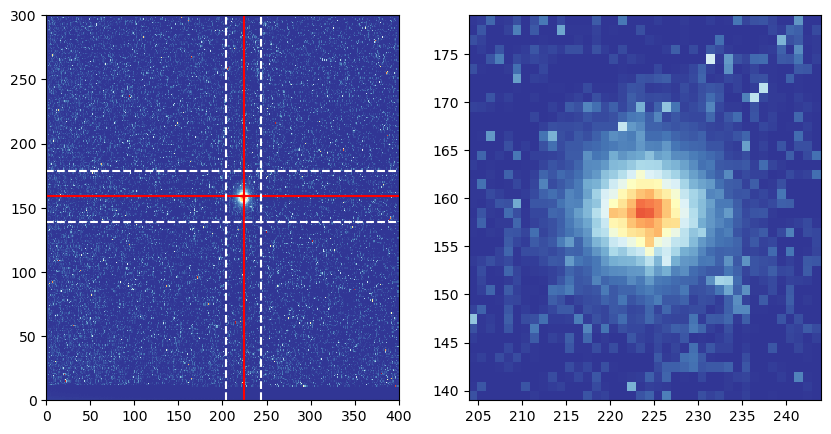

(139.0, 179.0)

In [16]:
fig, (ax, ax_2) = plt.subplots(1,2, figsize=(10,5))

ax.pcolormesh(cam_3[200,:,:], cmap="RdYlBu_r")
ax_2.pcolormesh(cam_3[200,:,:], cmap="RdYlBu_r")

ax.axvline([x_max], color="red")
ax.axhline([y_max], color="red")

ax.axvline([x_range[1]], color="white", ls="--")
ax.axvline([x_range[2]], color="white", ls="--")
ax.axhline([y_range[1]], color="white", ls="--")
ax.axhline([y_range[2]], color="white", ls="--")

ax_2.set_xlim(x_range)
ax_2.set_ylim(y_range)

In [17]:
cam_3_frame = (x=x_range, y=y_range)

(x = (204, 244), y = (139, 179))

## Cam 4:

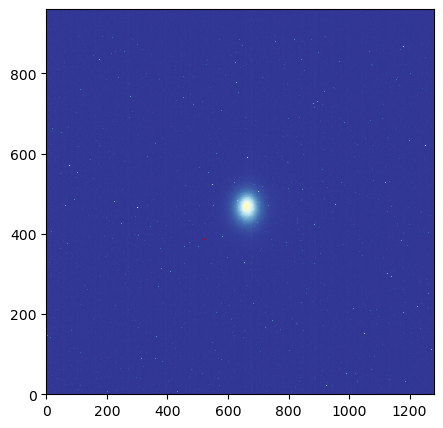

PyObject <matplotlib.collections.QuadMesh object at 0x7fc4efdd4490>

In [18]:
tmpp = cam_4[200,:,:];

fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.pcolormesh(tmpp, cmap="RdYlBu_r")

In [19]:
img_tmp = zeros(Float64, 958, 320, 426)

for ind in 1:958, x in 1:320, y in 1:426
    img_tmp[ind, x, y] = round(Int64, mean(cam_4[ind, (x-1)*3+1:(x-1)*3+3,(y-1)*3+1:(y-1)*3+3] ))
end

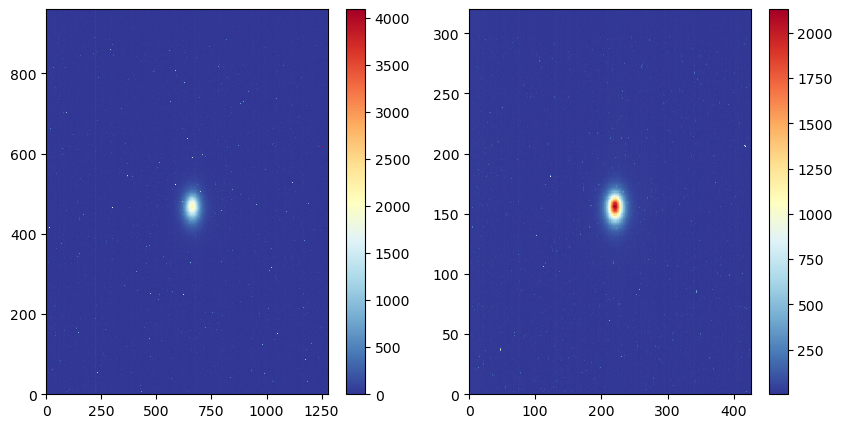

PyObject <matplotlib.colorbar.Colorbar object at 0x7fc2bc7bce20>

In [20]:
fig, (ax, ax_2) = plt.subplots(1,2, figsize=(10,5))

cb1 = ax.pcolormesh(cam_4[200,:,:], cmap="RdYlBu_r")
cb2 = ax_2.pcolormesh(img_tmp[200,:,:], cmap="RdYlBu_r")

fig.colorbar(cb1, ax=ax)
fig.colorbar(cb2, ax=ax_2)

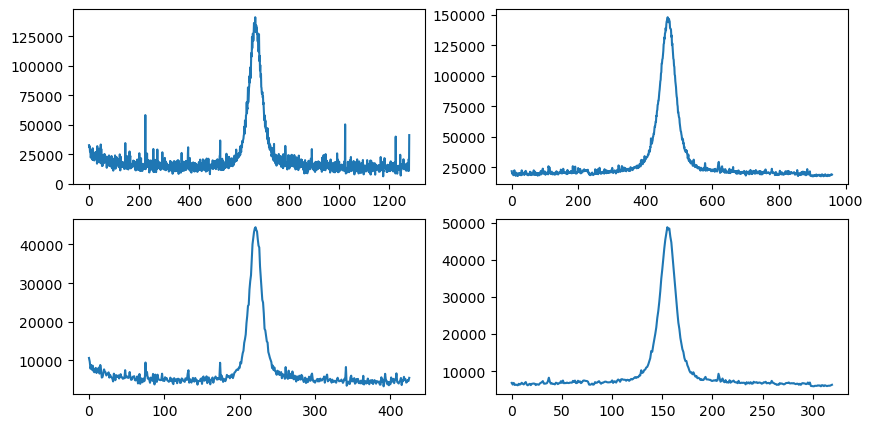

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc4ef0a2a00>

In [21]:
fig, ax = plt.subplots(2,2, figsize=(10,5))

ax[1].plot( sum(cam_4[200,:,:], dims=1)[1,:] )
ax[2].plot( sum(img_tmp[200,:,:], dims=1)[1,:] )

ax[3].plot( sum(cam_4[200,:,:], dims=2)[:,1] )
ax[4].plot( sum(img_tmp[200,:,:], dims=2)[:,1] )

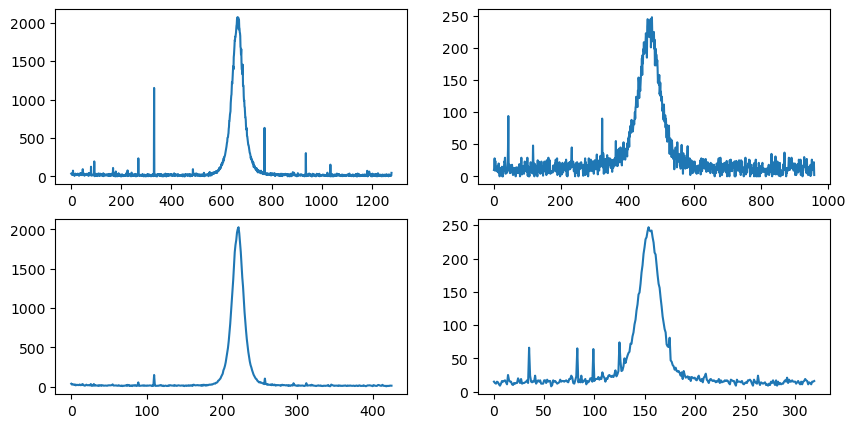

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc4eebf0b80>

In [22]:
fig, ax = plt.subplots(2,2, figsize=(10,5))

ax[1].plot( cam_4[200,155*3,:])
ax[2].plot( img_tmp[200,155,:])

ax[3].plot( cam_4[200,:,240*3])
ax[4].plot( img_tmp[200,:,240])

In [23]:
cam_4 = deepcopy(img_tmp);

In [24]:
sum_over_y = sum(cam_4, dims=2)[:,1,:]
sum_over_x = sum(cam_4, dims=3)[:,:,1]

y_max = argmax(sum(sum_over_x, dims=1)[1,:])
x_max = argmax(sum(sum_over_y, dims=1)[1,:])

δ = 35

y_range = (y_max-δ, y_max+δ)
x_range = (x_max-δ, x_max+δ)

(187, 257)

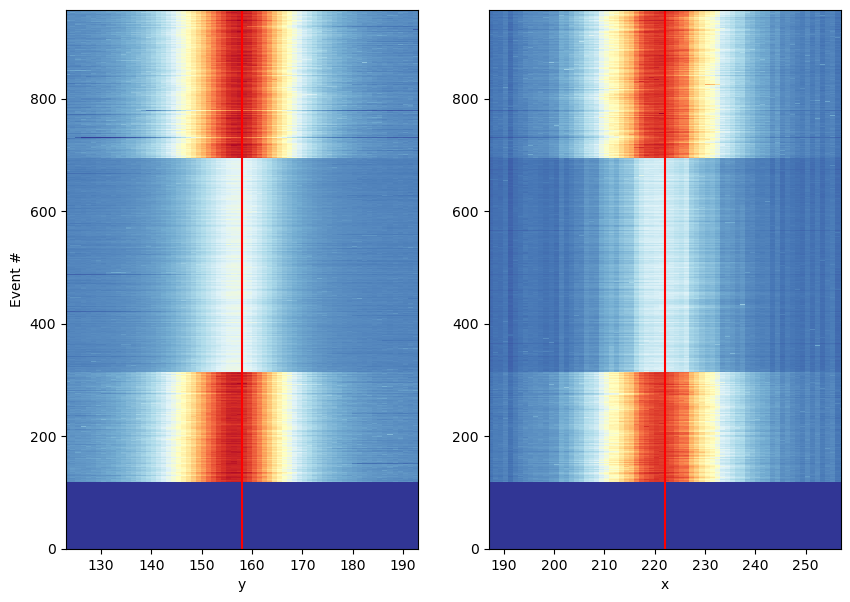

(187.0, 257.0)

In [25]:
fig, ax = plt.subplots(1,2, figsize=(10,7))

ax[1].pcolormesh(sum_over_x, cmap="RdYlBu_r")
ax[2].pcolormesh(sum_over_y, cmap="RdYlBu_r")

ax[1].axvline([y_max], color="red")
ax[2].axvline([x_max], color="red")

ax[1].set_xlabel("y")
ax[2].set_xlabel("x")
ax[1].set_ylabel("Event #")

ax[1].set_xlim(y_range[1], y_range[2])
ax[2].set_xlim(x_range[1], x_range[2])

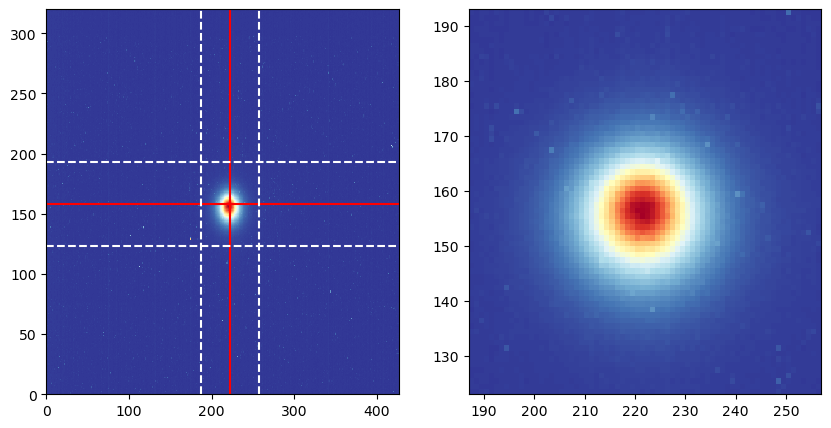

(123.0, 193.0)

In [26]:
fig, (ax, ax_2) = plt.subplots(1,2, figsize=(10,5))

ax.pcolormesh(cam_4[200,:,:], cmap="RdYlBu_r")
ax_2.pcolormesh(cam_4[200,:,:], cmap="RdYlBu_r")

ax.axvline([x_max], color="red")
ax.axhline([y_max], color="red")

ax.axvline([x_range[1]], color="white", ls="--")
ax.axvline([x_range[2]], color="white", ls="--")
ax.axhline([y_range[1]], color="white", ls="--")
ax.axhline([y_range[2]], color="white", ls="--")

ax_2.set_xlim(x_range)
ax_2.set_ylim(y_range)

In [27]:
cam_4_frame = (x=x_range, y=y_range)

(x = (187, 257), y = (123, 193))

# 1. Measurements with Small Charge: 

In [28]:
event_mask = 5. .< charge .< 15.


pix_threshold_1 = 1700
pix_threshold_2 = 2300
pix_threshold_3 = 3100
pix_threshold_4 = 750

# data_m1 = Dict(
#     "cam_1" => cam_1[event_mask,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]], 
#     "cam_2" => cam_2[event_mask,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]], 
#     "cam_3" => cam_3[event_mask,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]], 
#     "cam_4" => cam_4[event_mask,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]],
#     "charge" => charge[event_mask] .* 1.0
# )

data_m1 = Dict(
    "cam_1" => replace(x-> x > pix_threshold_1 ? NaN : x, cam_1[event_mask,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]]), 
    "cam_2" => replace(x-> x > pix_threshold_2 ? NaN : x, cam_2[event_mask,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]]), 
    "cam_3" => replace(x-> x > pix_threshold_3 ? NaN : x, cam_3[event_mask,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]]), 
    "cam_4" => replace(x-> x > pix_threshold_4 ? NaN : x, cam_4[event_mask,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]]),
    "charge" => charge[event_mask] .* 1.0,
    "ev_ind" => enumerate_events[event_mask] .* 1.0
)

# FileIO.save("../data/experiment/dataset_2/m1/images-satur.jld2", data_m1)
# images = load("../data/experiment/dataset_2/m1/images.jld2");

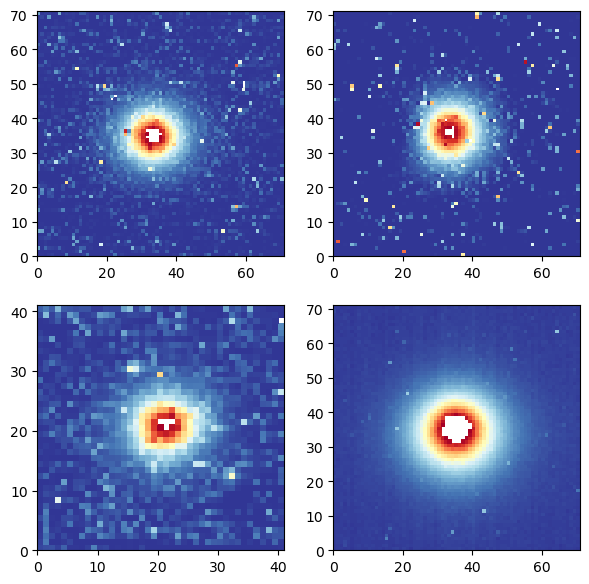

PyObject <matplotlib.collections.QuadMesh object at 0x7fc27b160ee0>

In [29]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(data_m1["cam_1"][210,:,:], cmap="RdYlBu_r")
ax[1,2].pcolormesh(data_m1["cam_2"][210,:,:], cmap="RdYlBu_r")
ax[2,1].pcolormesh(data_m1["cam_3"][210,:,:], cmap="RdYlBu_r")
ax[2,2].pcolormesh(data_m1["cam_4"][210,:,:], cmap="RdYlBu_r")

## Noise Distribution: 

In [30]:
# noise: 

bins = 0:1:4096

# 4096 bin is unused - valid are 0:4095

# kde_noise = kde(data_temp[pixel_mask]);

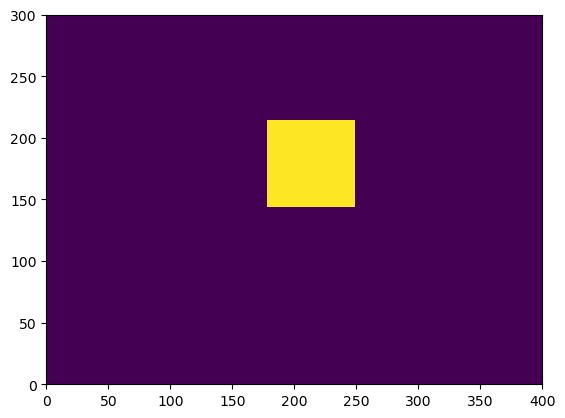

PyObject <matplotlib.collections.QuadMesh object at 0x7fc8c6954070>

In [31]:
# Camera 1: 

data_temp = cam_1[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_1 = normalize(histogram_noise, mode=:probability)

pixel_mask = falses(size(data_temp))
pixel_mask[:,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]] .= true

histogram_signal = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_signal_cam_1 = normalize(histogram_signal, mode=:probability);

plt.pcolormesh(pixel_mask[3,:,:])

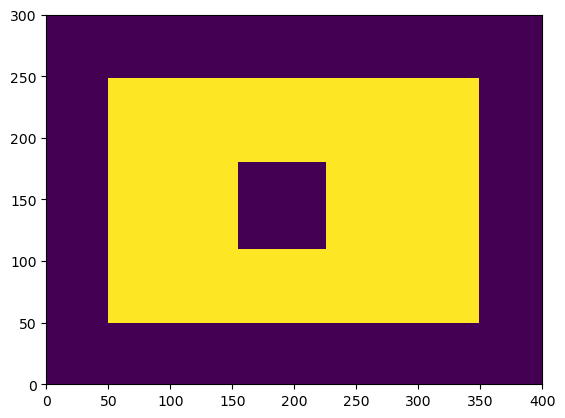

In [32]:
# Camera 2: 

data_temp = cam_2[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]] .= false

plt.pcolormesh(pixel_mask[3,:,:])

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_2 = normalize(histogram_noise, mode=:probability)

pixel_mask = falses(size(data_temp))
pixel_mask[:,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]] .= true

histogram_signal = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_signal_cam_2 = normalize(histogram_signal, mode=:probability);

In [33]:
# Camera 3: 

data_temp = cam_3[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_3 = normalize(histogram_noise, mode=:probability)

pixel_mask = falses(size(data_temp))
pixel_mask[:,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]] .= true

histogram_signal = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_signal_cam_3 = normalize(histogram_signal, mode=:probability);

# plt.pcolormesh(pixel_mask[3,:,:])

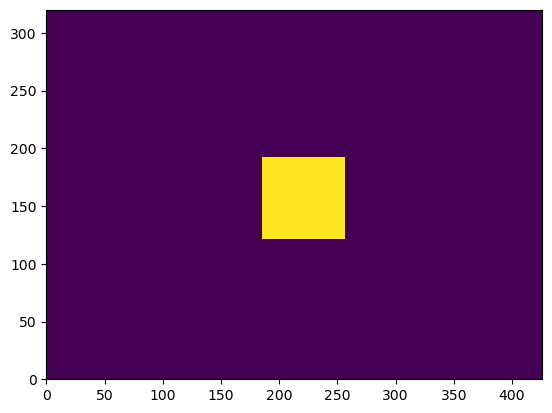

PyObject <matplotlib.collections.QuadMesh object at 0x7fc4eeef5d30>

In [34]:
# Camera 4: 

data_temp = cam_4[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_4 = normalize(histogram_noise, mode=:probability)

pixel_mask = falses(size(data_temp))
pixel_mask[:,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]] .= true

histogram_signal = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_signal_cam_4 = normalize(histogram_signal, mode=:probability);

plt.pcolormesh(pixel_mask[3,:,:])

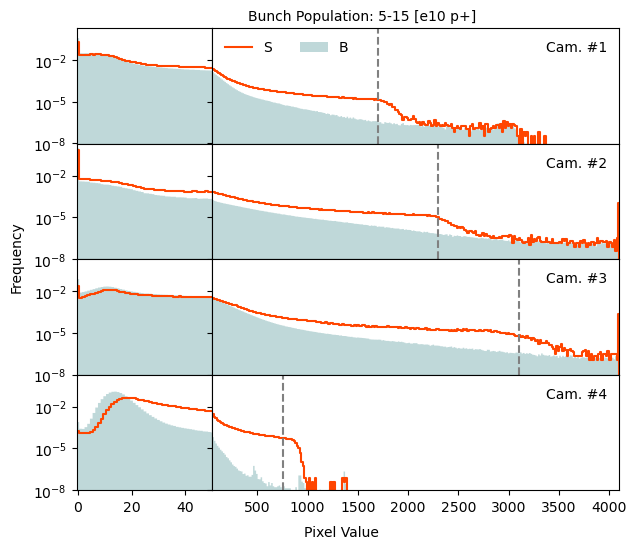

PyObject Text(0.37, 0.9, 'Bunch Population: 5-15 [e10 p+]')

In [35]:
fillcolor = "cadetblue"
linecolor = "orangered"
color_2 = "steelblue"

fig, ax = plt.subplots(4,2, figsize=(7,6), sharey=true,  gridspec_kw=Dict("width_ratios"=> [1,3]))

fig.subplots_adjust(hspace=0.0, wspace=0.0)

# subplot #1 
x_s1, y_s1 = reduced_steps(histogram_signal_cam_1, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_1, 1)

ax[1].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[1].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[1].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_1, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_1, 15)

ax[5].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[5].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[5].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[5].legend(loc="upper left", ncol=3, framealpha=0.0)
ax[5].text(0.82,0.8,"Cam. #1", transform=ax[5].transAxes)
ax[1].set_xlim(-0.5, 50)
ax[5].set_xlim(50,4097)

#subplot #2:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_2, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_2, 1)

ax[2].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[2].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[2].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_2, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_2, 15)

ax[6].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[6].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[6].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[6].text(0.82,0.8,"Cam. #2", transform=ax[6].transAxes)
ax[2].set_xlim(-0.5, 50)
ax[6].set_xlim(50,4097)
ax[6].set_ylim(10e-9, 1)

#subplot #3:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_3, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_3, 1)

ax[3].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[3].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[3].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_3, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_3, 15)

ax[7].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[7].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[7].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[7].text(0.82,0.8,"Cam. #3", transform=ax[7].transAxes)
ax[3].set_xlim(-0.5, 50)
ax[7].set_xlim(50,4097)

#subplot #4:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_4, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_4, 1)

ax[4].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[4].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[4].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_4, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_4, 15)

ax[8].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[8].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[8].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[8].text(0.82,0.8,"Cam. #4", transform=ax[8].transAxes)
ax[4].set_yscale("log")
ax[4].set_xlim(-0.5, 50)
ax[8].set_xlim(50,4097)
ax[8].set_ylim(10e-9, 2)

ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks([])
ax[7].set_xticks([])
ax[5].set_xticks([])
ax[6].set_xticks([])

ax[1,2].axvline([pix_threshold_1], linestyle = "--", color="gray")
ax[2,2].axvline([pix_threshold_2], linestyle = "--", color="gray")
ax[3,2].axvline([pix_threshold_3], linestyle = "--", color="gray")
ax[4,2].axvline([pix_threshold_4], linestyle = "--", color="gray")

fig.text(0.03, 0.5, "Frequency", va="center", rotation="vertical")
fig.text(0.45, 0.04, "Pixel Value", va="center", rotation="horizontal")
# fig.text(0.37, 0.9, "Bunch Population: 15-30 [e10 p+]", va="center", rotation="horizontal")
fig.text(0.37, 0.9, "Bunch Population: 5-15 [e10 p+]", va="center", rotation="horizontal")

# fig.savefig("../plots/fig-1-1.pdf", bbox_inches = "tight")

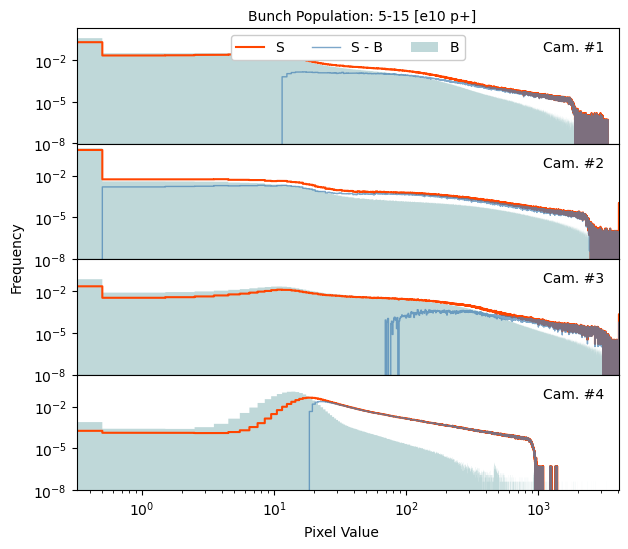

PyObject Text(0.37, 0.9, 'Bunch Population: 5-15 [e10 p+]')

In [36]:
fillcolor = "cadetblue"
linecolor = "orangered"
color_2 = "steelblue"

fig, ax = plt.subplots(4,1, figsize=(7,6), sharex=true, sharey=true)

fig.subplots_adjust(hspace=0.0, wspace=0.0)

# subplot #1 
x_s1, y_s1 = reduced_steps(histogram_signal_cam_1, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_1, 1)

ax[1].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[1].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[1].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[1].legend(loc="upper center", ncol=3, framealpha=1)
ax[1].text(0.86,0.8,"Cam. #1", transform=ax[1].transAxes)

#subplot #2:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_2, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_2, 1)

ax[2].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[2].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[2].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

ax[2].text(0.86,0.8,"Cam. #2", transform=ax[2].transAxes)
ax[2].set_ylim(10e-9, 1)

#subplot #3:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_3, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_3, 1)

ax[3].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[3].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[3].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

ax[3].text(0.86,0.8,"Cam. #3", transform=ax[3].transAxes)

#subplot #4:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_4, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_4, 1)

ax[4].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[4].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[4].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

ax[4].text(0.86,0.8,"Cam. #4", transform=ax[4].transAxes)
ax[4].set_yscale("log")
ax[4].set_xscale("log")
ax[4].set_xlim(0,4097)
ax[4].set_ylim(10e-9, 2)

fig.text(0.03, 0.5, "Frequency", va="center", rotation="vertical")
fig.text(0.45, 0.04, "Pixel Value", va="center", rotation="horizontal")
# fig.text(0.37, 0.9, "Bunch Population: 15-30 [e10 p+]", va="center", rotation="horizontal")
fig.text(0.37, 0.9, "Bunch Population: 5-15 [e10 p+]", va="center", rotation="horizontal")

# fig.savefig("../plots/fig-1-1.pdf", bbox_inches = "tight")

In [ ]:
# FileIO.save("../data/experiment/dataset_2/m1/background.jld2", 
#     Dict("cam_1" => histogram_noise_cam_1, 
#         "cam_2" => histogram_noise_cam_2, 
#         "cam_3" => histogram_noise_cam_3, 
#         "cam_4" => histogram_noise_cam_4))

# 2. Measurements with Large Charge: 

In [37]:
event_mask = charge .> 15.

pix_threshold_1 = 2700
pix_threshold_2 = 3400
pix_threshold_3 = 2400
pix_threshold_4 = 1750


# data_m2 = Dict(
#     "cam_1" => cam_1[event_mask,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]], 
#     "cam_2" => cam_2[event_mask,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]], 
#     "cam_3" => cam_3[event_mask,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]], 
#     "cam_4" => cam_4[event_mask,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]],
#     "charge" => charge[event_mask] .* 1.0
# ) # no filters

data_m2 = Dict(
    "cam_1" => replace(x-> x > pix_threshold_1 ? NaN : x, cam_1[event_mask,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]]), 
    "cam_2" => replace(x-> x > pix_threshold_2 ? NaN : x, cam_2[event_mask,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]]), 
    "cam_3" => replace(x-> x > pix_threshold_3 ? NaN : x, cam_3[event_mask,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]]), 
    "cam_4" => replace(x-> x > pix_threshold_4 ? NaN : x, cam_4[event_mask,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]]),
    "charge" => charge[event_mask] .* 1.0,
    "ev_ind" => enumerate_events[event_mask] .* 1.0
)

# FileIO.save("../data/experiment/dataset_2/m2/images-satur.jld2", data_m2)

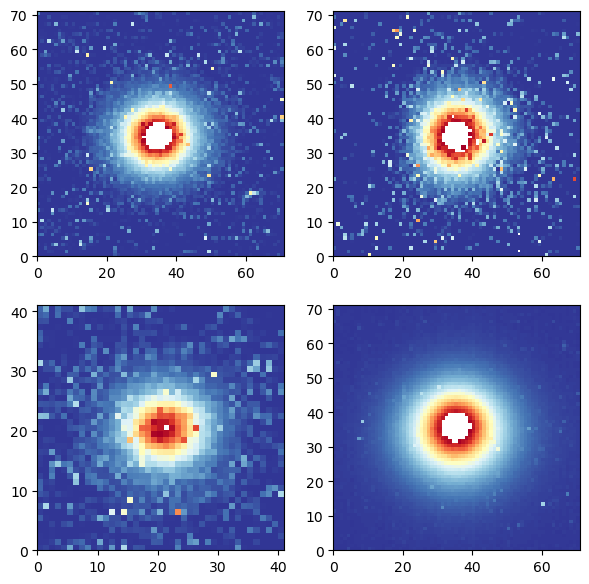

PyObject <matplotlib.collections.QuadMesh object at 0x7fc2bd5aba00>

In [38]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(data_m2["cam_1"][210,:,:], cmap="RdYlBu_r")
ax[1,2].pcolormesh(data_m2["cam_2"][210,:,:], cmap="RdYlBu_r")
ax[2,1].pcolormesh(data_m2["cam_3"][210,:,:], cmap="RdYlBu_r")
ax[2,2].pcolormesh(data_m2["cam_4"][210,:,:], cmap="RdYlBu_r")

## Noise Distribution: 

In [39]:
# noise: 

bins = 0:1:4096

# 4096 bin is unused - valid are 0:4095

# kde_noise = kde(data_temp[pixel_mask]);

In [40]:
# Camera 1: 

data_temp = cam_1[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_1 = normalize(histogram_noise, mode=:probability)

pixel_mask = falses(size(data_temp))
pixel_mask[:,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]] .= true

histogram_signal = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_signal_cam_1 = normalize(histogram_signal, mode=:probability);

# plt.pcolormesh(pixel_mask[3,:,:])

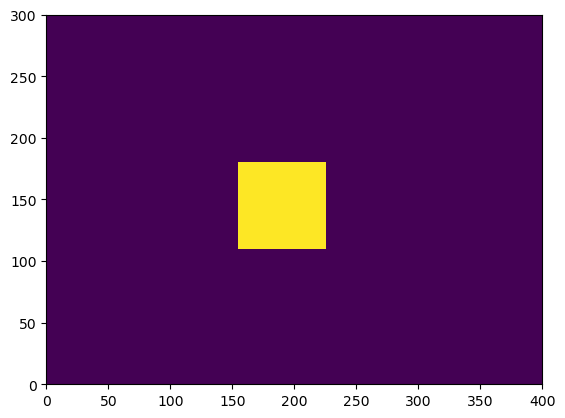

PyObject <matplotlib.collections.QuadMesh object at 0x7fc2bda097c0>

In [41]:
# Camera 2: 

data_temp = cam_2[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_2 = normalize(histogram_noise, mode=:probability)

pixel_mask = falses(size(data_temp))
pixel_mask[:,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]] .= true

histogram_signal = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_signal_cam_2 = normalize(histogram_signal, mode=:probability);

plt.pcolormesh(pixel_mask[3,:,:])

In [42]:
# Camera 3: 

data_temp = cam_3[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_3 = normalize(histogram_noise, mode=:probability)

pixel_mask = falses(size(data_temp))
pixel_mask[:,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]] .= true

histogram_signal = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_signal_cam_3 = normalize(histogram_signal, mode=:probability);

# plt.pcolormesh(pixel_mask[3,:,:])

In [43]:
# Camera 4: 

data_temp = cam_4[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_4 = normalize(histogram_noise, mode=:probability)

pixel_mask = falses(size(data_temp))
pixel_mask[:,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]] .= true

histogram_signal = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_signal_cam_4 = normalize(histogram_signal, mode=:probability);

# plt.pcolormesh(pixel_mask[3,:,:])

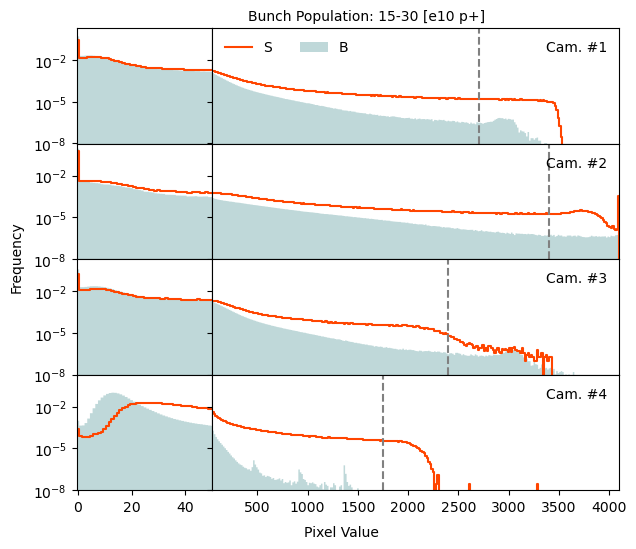

PyObject Text(0.37, 0.9, 'Bunch Population: 15-30 [e10 p+]')

In [44]:
fillcolor = "cadetblue"
linecolor = "orangered"
color_2 = "steelblue"

fig, ax = plt.subplots(4,2, figsize=(7,6), sharey=true,  gridspec_kw=Dict("width_ratios"=> [1,3]))

fig.subplots_adjust(hspace=0.0, wspace=0.0)

# subplot #1 
x_s1, y_s1 = reduced_steps(histogram_signal_cam_1, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_1, 1)

ax[1].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[1].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[1].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_1, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_1, 15)

ax[5].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[5].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[5].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[5].legend(loc="upper left", ncol=3, framealpha=0.0)
ax[5].text(0.82,0.8,"Cam. #1", transform=ax[5].transAxes)
ax[1].set_xlim(-0.5, 50)
ax[5].set_xlim(50,4097)

#subplot #2:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_2, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_2, 1)

ax[2].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[2].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[2].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_2, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_2, 15)

ax[6].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[6].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[6].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[6].text(0.82,0.8,"Cam. #2", transform=ax[6].transAxes)
ax[2].set_xlim(-0.5, 50)
ax[6].set_xlim(50,4097)
ax[6].set_ylim(10e-9, 1)

#subplot #3:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_3, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_3, 1)

ax[3].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[3].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[3].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_3, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_3, 15)

ax[7].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[7].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[7].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[7].text(0.82,0.8,"Cam. #3", transform=ax[7].transAxes)
ax[3].set_xlim(-0.5, 50)
ax[7].set_xlim(50,4097)

#subplot #4:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_4, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_4, 1)

ax[4].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[4].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[4].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_4, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_4, 15)

ax[8].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[8].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
# ax[8].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[8].text(0.82,0.8,"Cam. #4", transform=ax[8].transAxes)
ax[4].set_yscale("log")
ax[4].set_xlim(-0.5, 50)
ax[8].set_xlim(50,4097)
ax[8].set_ylim(10e-9, 2)

ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks([])
ax[7].set_xticks([])
ax[5].set_xticks([])
ax[6].set_xticks([])

ax[1,2].axvline([pix_threshold_1], linestyle = "--", color="gray")
ax[2,2].axvline([pix_threshold_2], linestyle = "--", color="gray")
ax[3,2].axvline([pix_threshold_3], linestyle = "--", color="gray")
ax[4,2].axvline([pix_threshold_4], linestyle = "--", color="gray")

fig.text(0.03, 0.5, "Frequency", va="center", rotation="vertical")
fig.text(0.45, 0.04, "Pixel Value", va="center", rotation="horizontal")
fig.text(0.37, 0.9, "Bunch Population: 15-30 [e10 p+]", va="center", rotation="horizontal")

# fig.savefig("../plots/fig-1-1.pdf", bbox_inches = "tight")

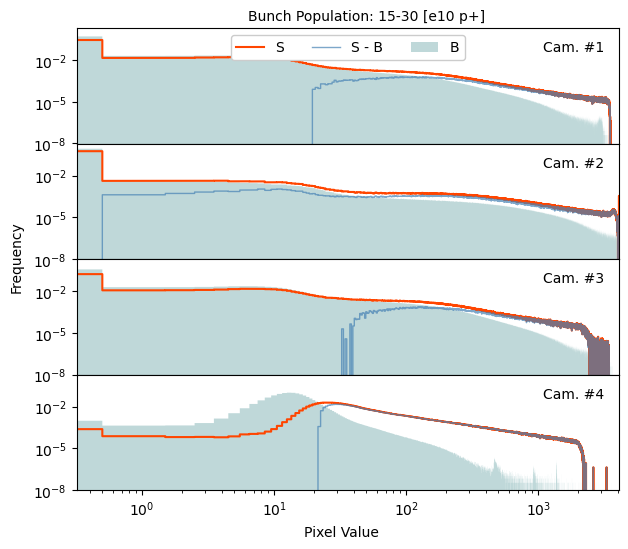

PyObject Text(0.37, 0.9, 'Bunch Population: 15-30 [e10 p+]')

In [45]:
fillcolor = "cadetblue"
linecolor = "orangered"
color_2 = "steelblue"

fig, ax = plt.subplots(4,1, figsize=(7,6), sharex=true, sharey=true)

fig.subplots_adjust(hspace=0.0, wspace=0.0)

# subplot #1 
x_s1, y_s1 = reduced_steps(histogram_signal_cam_1, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_1, 1)

ax[1].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[1].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[1].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[1].legend(loc="upper center", ncol=3, framealpha=1)
ax[1].text(0.86,0.8,"Cam. #1", transform=ax[1].transAxes)

#subplot #2:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_2, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_2, 1)

ax[2].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[2].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[2].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

ax[2].text(0.86,0.8,"Cam. #2", transform=ax[2].transAxes)
ax[2].set_ylim(10e-9, 1)

#subplot #3:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_3, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_3, 1)

ax[3].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[3].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[3].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

ax[3].text(0.86,0.8,"Cam. #3", transform=ax[3].transAxes)

#subplot #4:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_4, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_4, 1)

ax[4].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[4].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[4].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

ax[4].text(0.86,0.8,"Cam. #4", transform=ax[4].transAxes)
ax[4].set_yscale("log")
ax[4].set_xscale("log")
ax[4].set_xlim(0,4097)
ax[4].set_ylim(10e-9, 2)

fig.text(0.03, 0.5, "Frequency", va="center", rotation="vertical")
fig.text(0.45, 0.04, "Pixel Value", va="center", rotation="horizontal")
fig.text(0.37, 0.9, "Bunch Population: 15-30 [e10 p+]", va="center", rotation="horizontal")

# fig.savefig("../plots/fig-1-1.pdf", bbox_inches = "tight")

In [ ]:
# FileIO.save("../data/experiment/dataset_2/m2/background.jld2", 
#     Dict("cam_1" => histogram_noise_cam_1, 
#         "cam_2" => histogram_noise_cam_2, 
#         "cam_3" => histogram_noise_cam_3, 
#         "cam_4" => histogram_noise_cam_4))

In [ ]:
# nanmean(x) = mean(filter(!isnan,x))
# nanmean(x,y) = mapslices(nanmean,x,y)